# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [15]:
%pip install --upgrade plotly

## Import Statements

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [17]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [18]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [19]:
print("Income:", df_hh_income.shape)
print("Poverty:", df_pct_poverty.shape)
print("High School:", df_pct_completed_hs.shape)
print("Race:", df_share_race_city.shape)
print("Fatalities:", df_fatalities.shape)


Income: (29322, 3)
Poverty: (29329, 3)
High School: (29329, 3)
Race: (29268, 7)
Fatalities: (2535, 14)


In [20]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [21]:
print("Income:", df_hh_income.columns.tolist())
print("Poverty:", df_pct_poverty.columns.tolist())
print("High School:", df_pct_completed_hs.columns.tolist())
print("Race:", df_share_race_city.columns.tolist())
print("Fatalities:", df_fatalities.columns.tolist())


Income: ['Geographic Area', 'City', 'Median Income']
Poverty: ['Geographic Area', 'City', 'poverty_rate']
High School: ['Geographic Area', 'City', 'percent_completed_hs']
Race: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
Fatalities: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [22]:
datasets = {
    "Income": df_hh_income,
    "Poverty": df_pct_poverty,
    "High School": df_pct_completed_hs,
    "Race": df_share_race_city,
    "Fatalities": df_fatalities
}

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    print("NaN count:", df.isna().sum().sum())
    print("Duplicated rows:", df.duplicated().sum())



=== Income ===
NaN count: 51
Duplicated rows: 0

=== Poverty ===
NaN count: 0
Duplicated rows: 0

=== High School ===
NaN count: 0
Duplicated rows: 0

=== Race ===
NaN count: 0
Duplicated rows: 0

=== Fatalities ===
NaN count: 346
Duplicated rows: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [23]:
# 欠損値の処理
df_hh_income = df_hh_income.dropna()  # 行ごと削除（または fillna(df_hh_income['Median Income'].median()) で中央値補完）

# Fatalities の欠損値を "Unknown" で埋める（文字列カラム用）
df_fatalities = df_fatalities.fillna("Unknown")

# ダブルチェック
print("Income NaN:", df_hh_income.isna().sum().sum())
print("Fatalities NaN:", df_fatalities.isna().sum().sum())


Income NaN: 0
Fatalities NaN: 0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

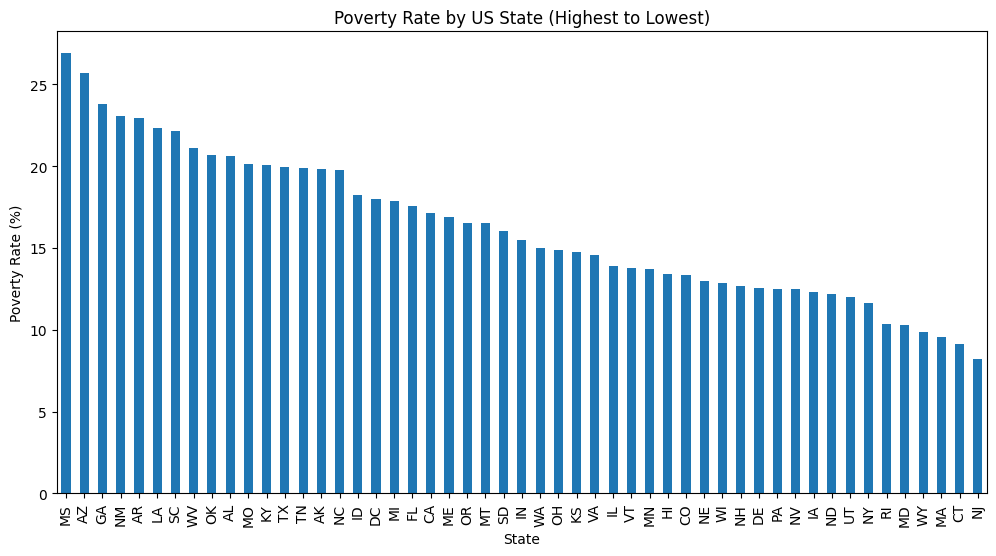

(('MS', 26.88425414364641), ('NJ', 8.19097605893186))

In [24]:
# 読み込んだ poverty_rate が文字列として扱われているので、数値に変換する
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")

# 州ごとの平均貧困率を計算
poverty_by_state = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().sort_values(ascending=False)

# 棒グラフ描画
plt.figure(figsize=(12,6))
poverty_by_state.plot(kind="bar")
plt.title("Poverty Rate by US State (Highest to Lowest)")
plt.ylabel("Poverty Rate (%)")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.show()

# 最高と最低の州を抽出
highest_state = poverty_by_state.idxmax(), poverty_by_state.max()
lowest_state = poverty_by_state.idxmin(), poverty_by_state.min()

highest_state, lowest_state


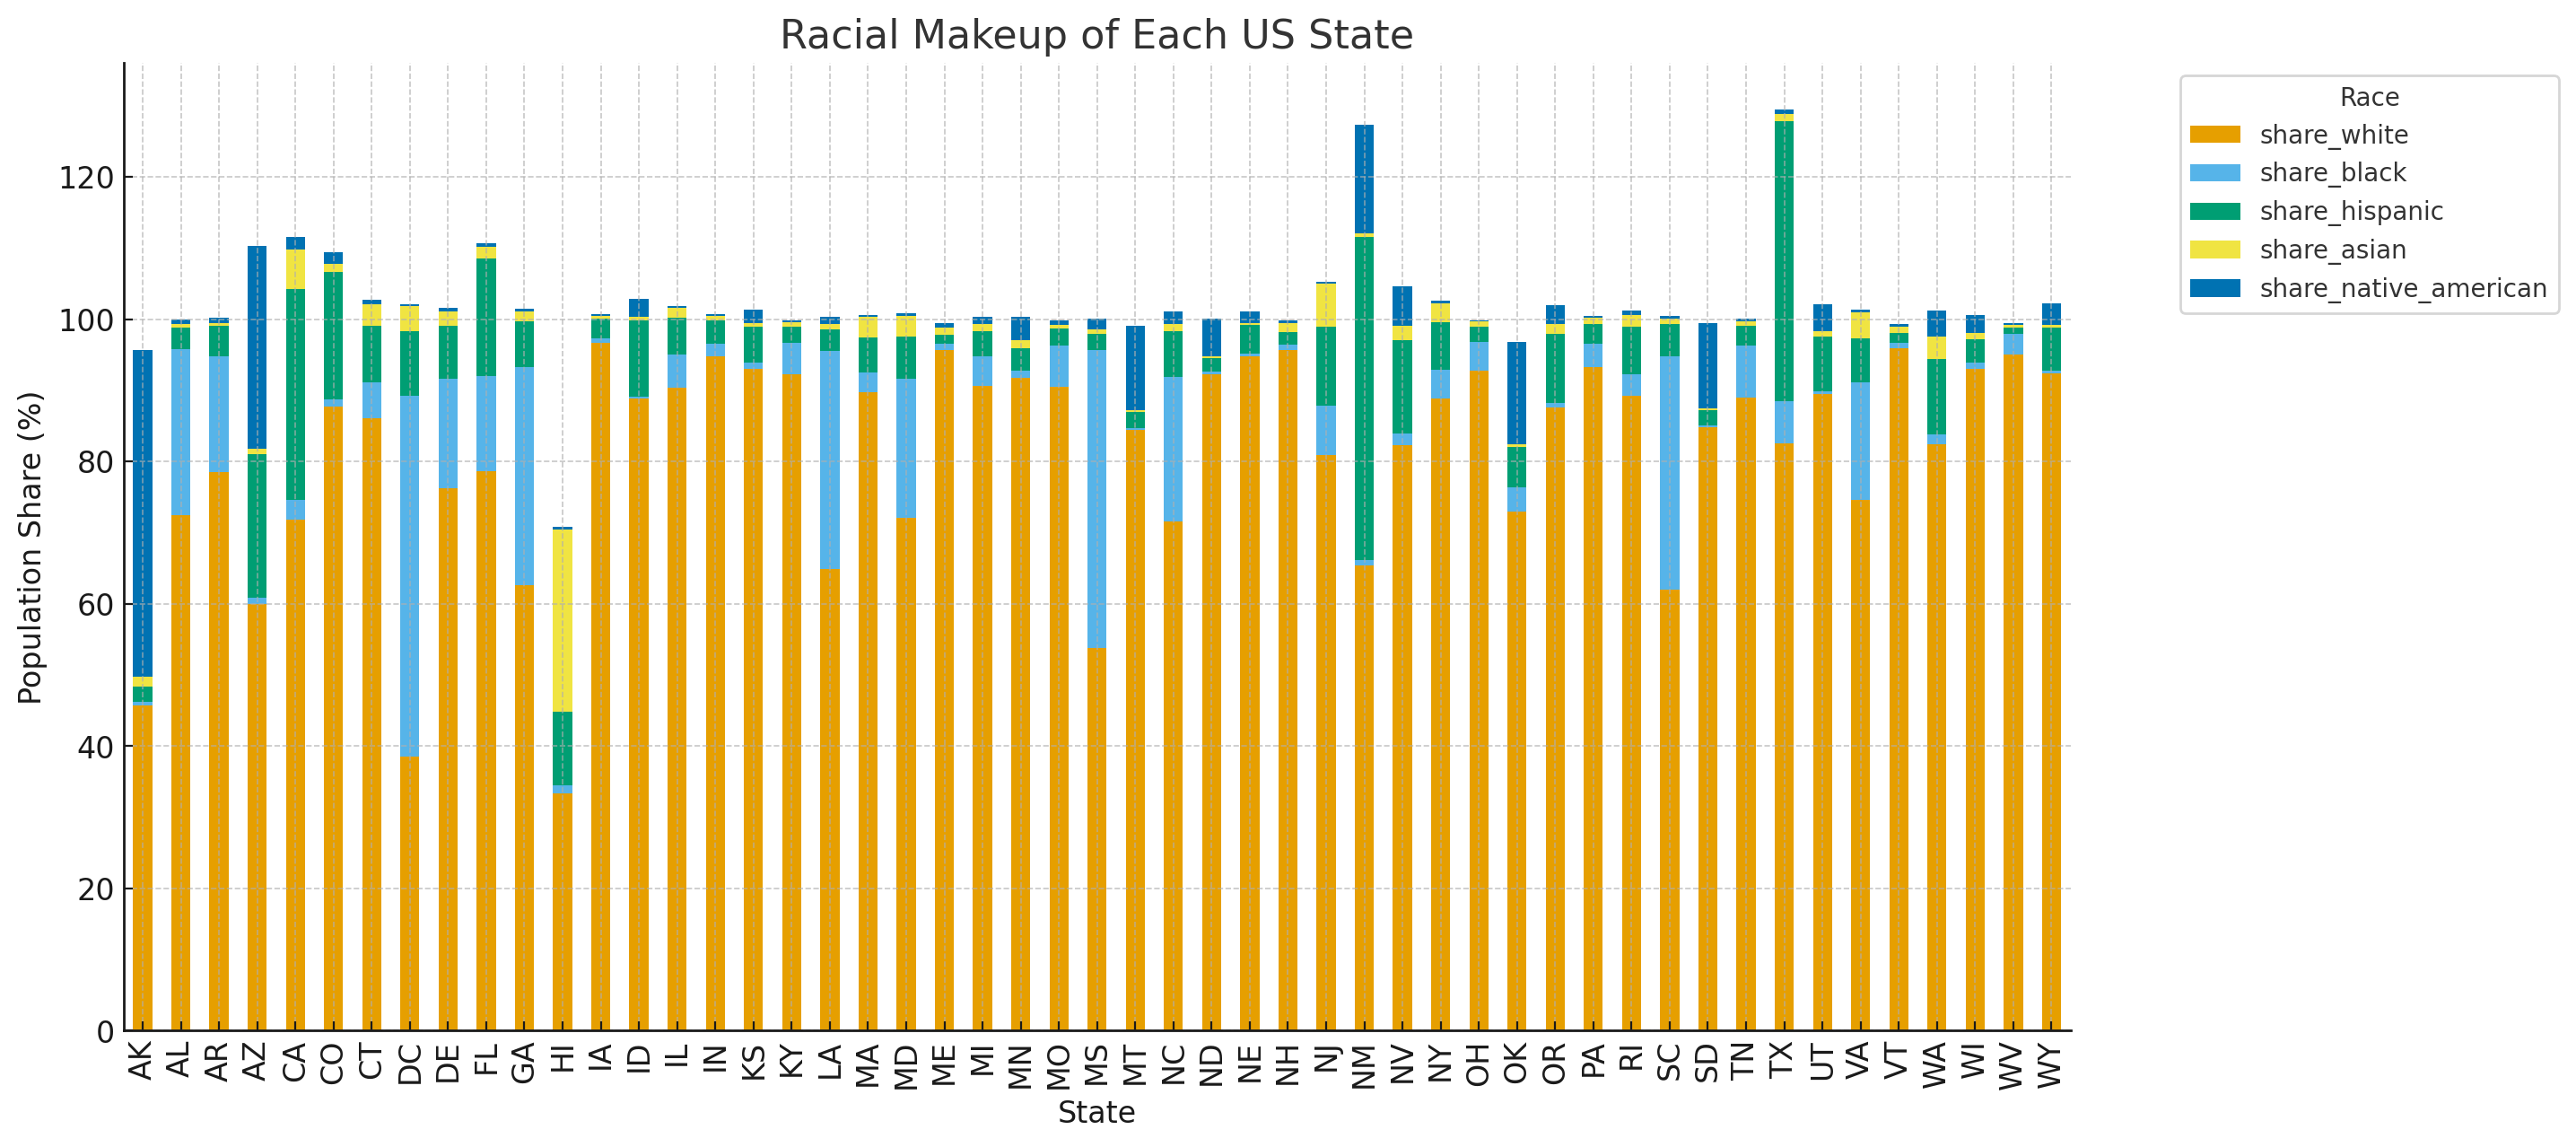

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

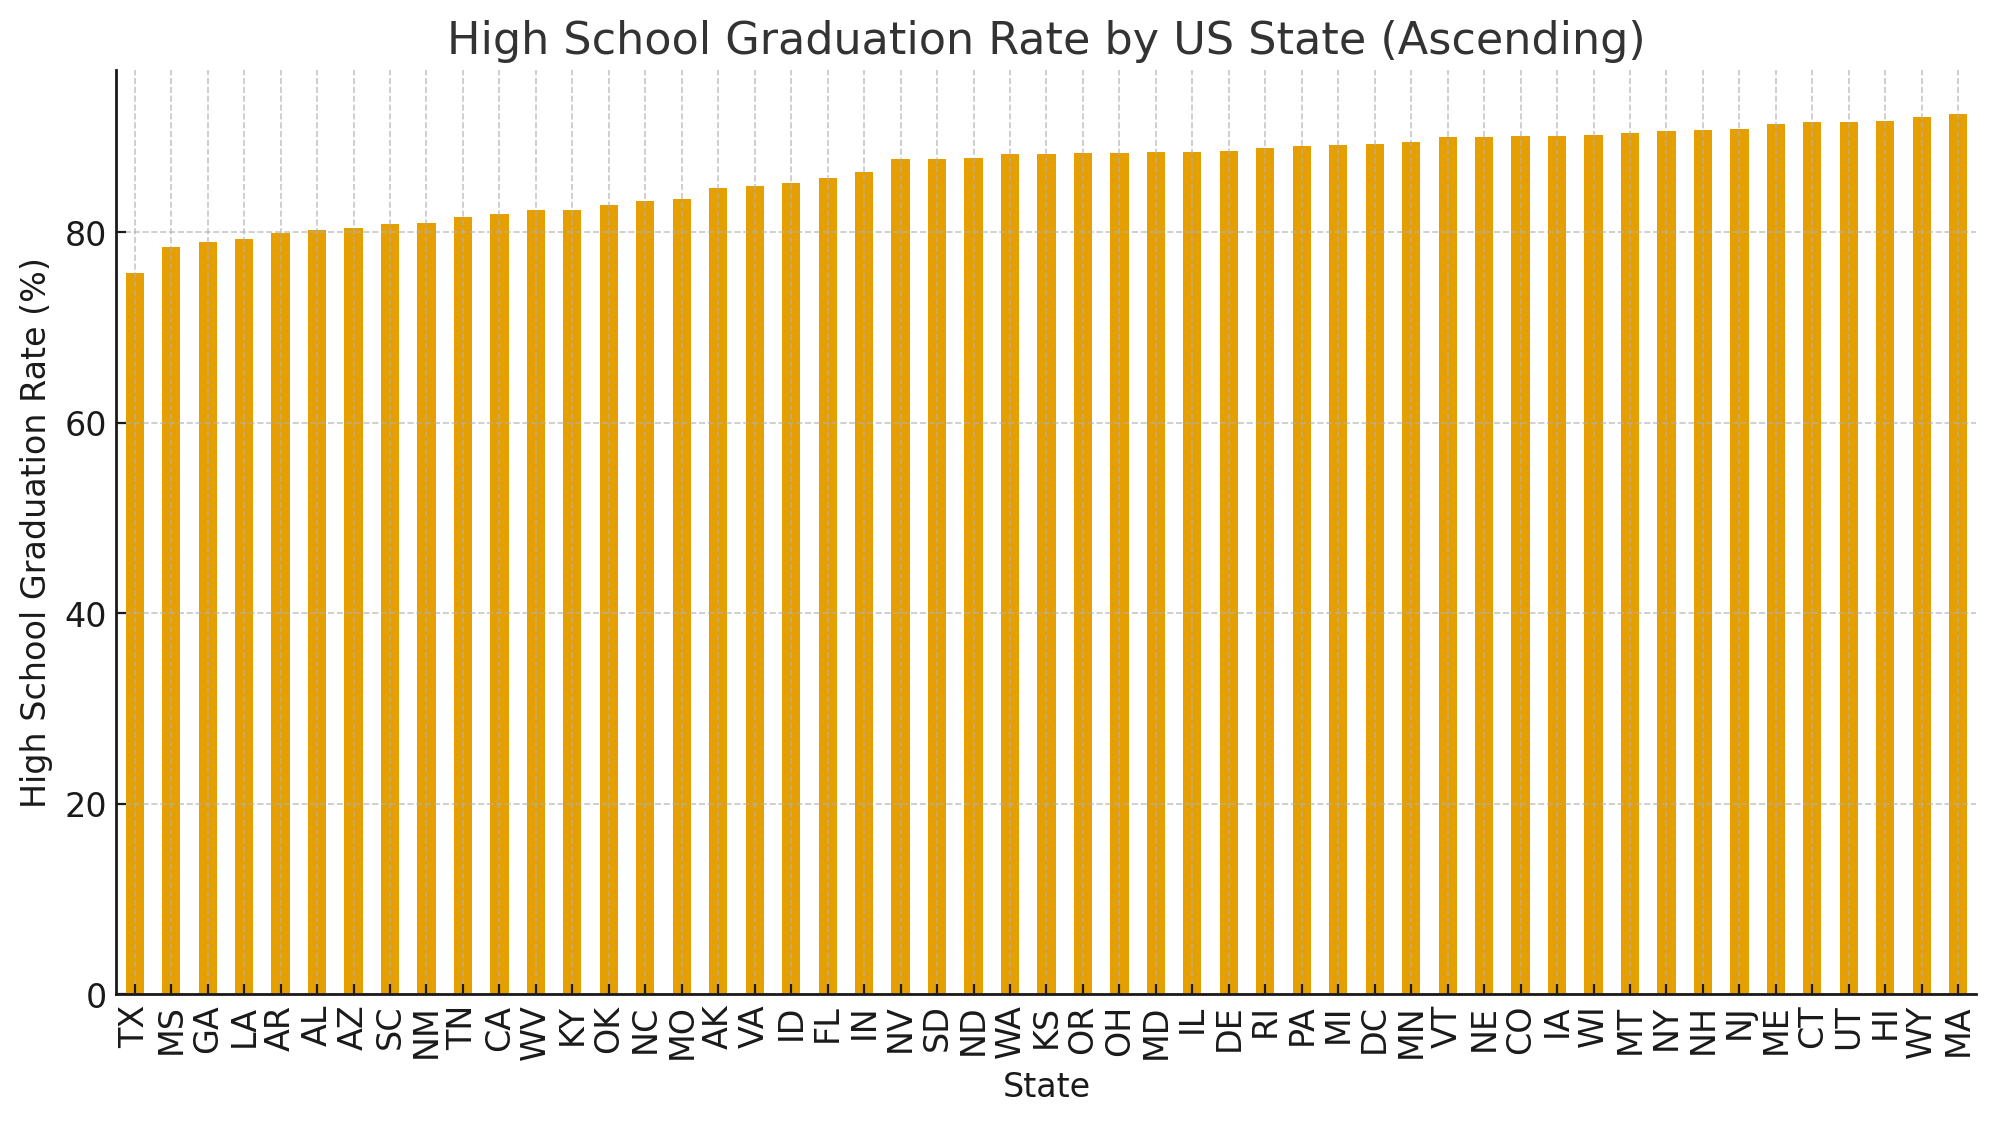

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

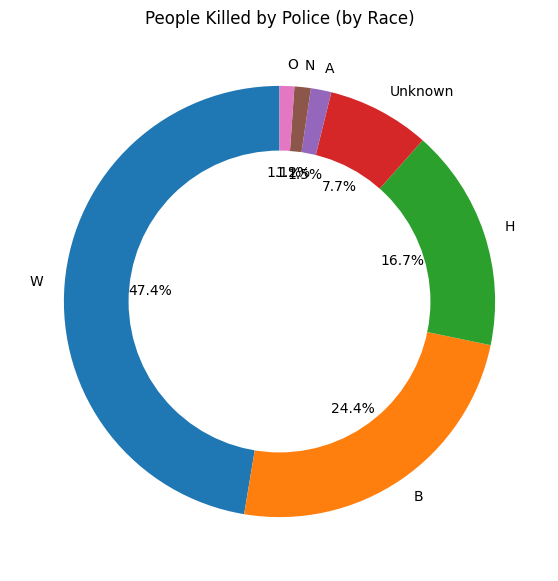

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# データを読み込み（ファイルをアップロード済みの場合）
df_fatalities = pd.read_csv("Deaths_by_Police_US.csv", encoding="windows-1252")

# 欠損を処理
df_fatalities["race"] = df_fatalities["race"].fillna("Unknown")

# 人種ごとの死亡者数を集計
race_counts = df_fatalities["race"].value_counts()

# ドーナツチャート作成
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90
)

# 中央を白く塗ってドーナツ化
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("People Killed by Police (by Race)")
plt.show()


**Percentage of Police race in the US**

*   White officers … about 65–70%
*   Black officers … about 12–13%


*   Hispanic officers … about 12–15%
*   Asian officers … around 2–3%


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

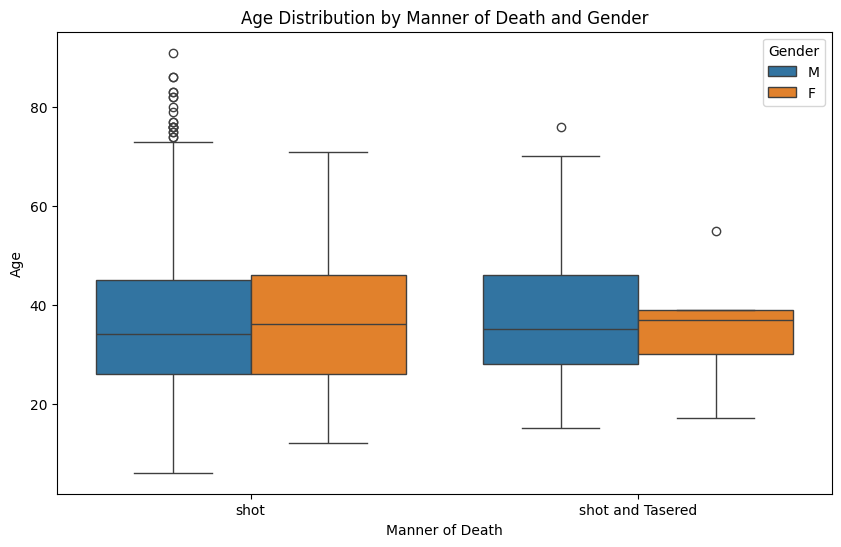

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データを読み込み（既に df_fatalities がある場合は不要）
df_fatalities = pd.read_csv("Deaths_by_Police_US.csv", encoding="windows-1252")

# 欠損処理
df_fatalities["age"] = pd.to_numeric(df_fatalities["age"], errors="coerce")
df_fatalities = df_fatalities.dropna(subset=["age", "gender", "manner_of_death"])

# ボックスプロット描画
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_fatalities,
    x="manner_of_death",
    y="age",
    hue="gender"
)
plt.title("Age Distribution by Manner of Death and Gender")
plt.ylabel("Age")
plt.xlabel("Manner of Death")
plt.legend(title="Gender")
plt.show()


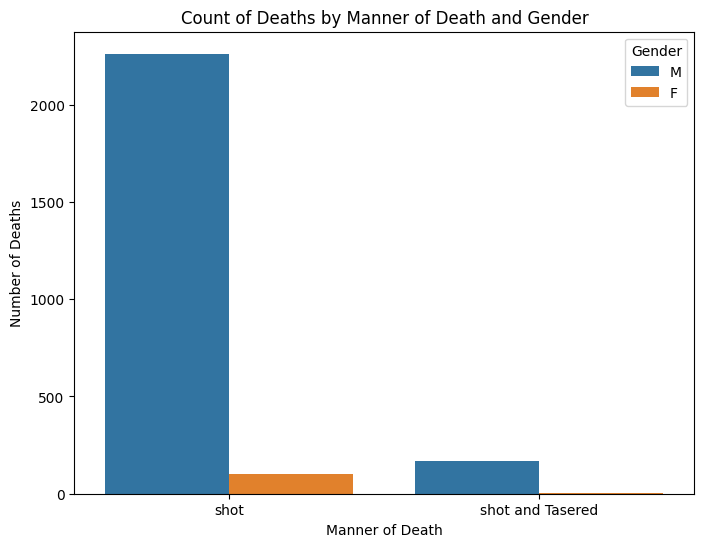

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データ読み込み（既に df_fatalities があるなら不要）
df_fatalities = pd.read_csv("Deaths_by_Police_US.csv", encoding="windows-1252")

# 欠損処理
df_fatalities = df_fatalities.dropna(subset=["gender", "manner_of_death"])

# 件数をカウントして棒グラフ化
plt.figure(figsize=(8,6))
sns.countplot(
    data=df_fatalities,
    x="manner_of_death",
    hue="gender"
)

plt.title("Count of Deaths by Manner of Death and Gender")
plt.xlabel("Manner of Death")
plt.ylabel("Number of Deaths")
plt.legend(title="Gender")
plt.show()


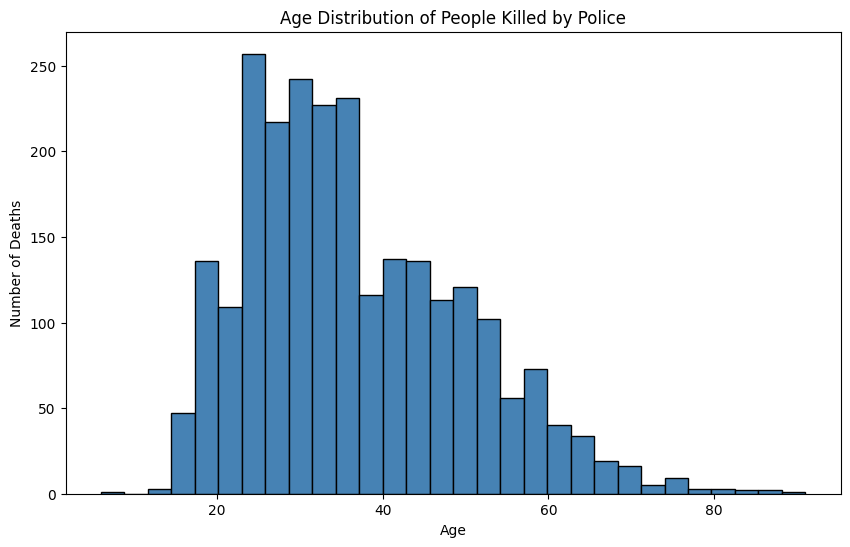

In [29]:
import matplotlib.pyplot as plt

# 欠損を処理
df_fatalities["age"] = pd.to_numeric(df_fatalities["age"], errors="coerce")
df_fatalities = df_fatalities.dropna(subset=["age"])

# 年齢分布をヒストグラムで可視化
plt.figure(figsize=(10,6))
plt.hist(df_fatalities["age"], bins=30, color="steelblue", edgecolor="black")
plt.title("Age Distribution of People Killed by Police")
plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.show()


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

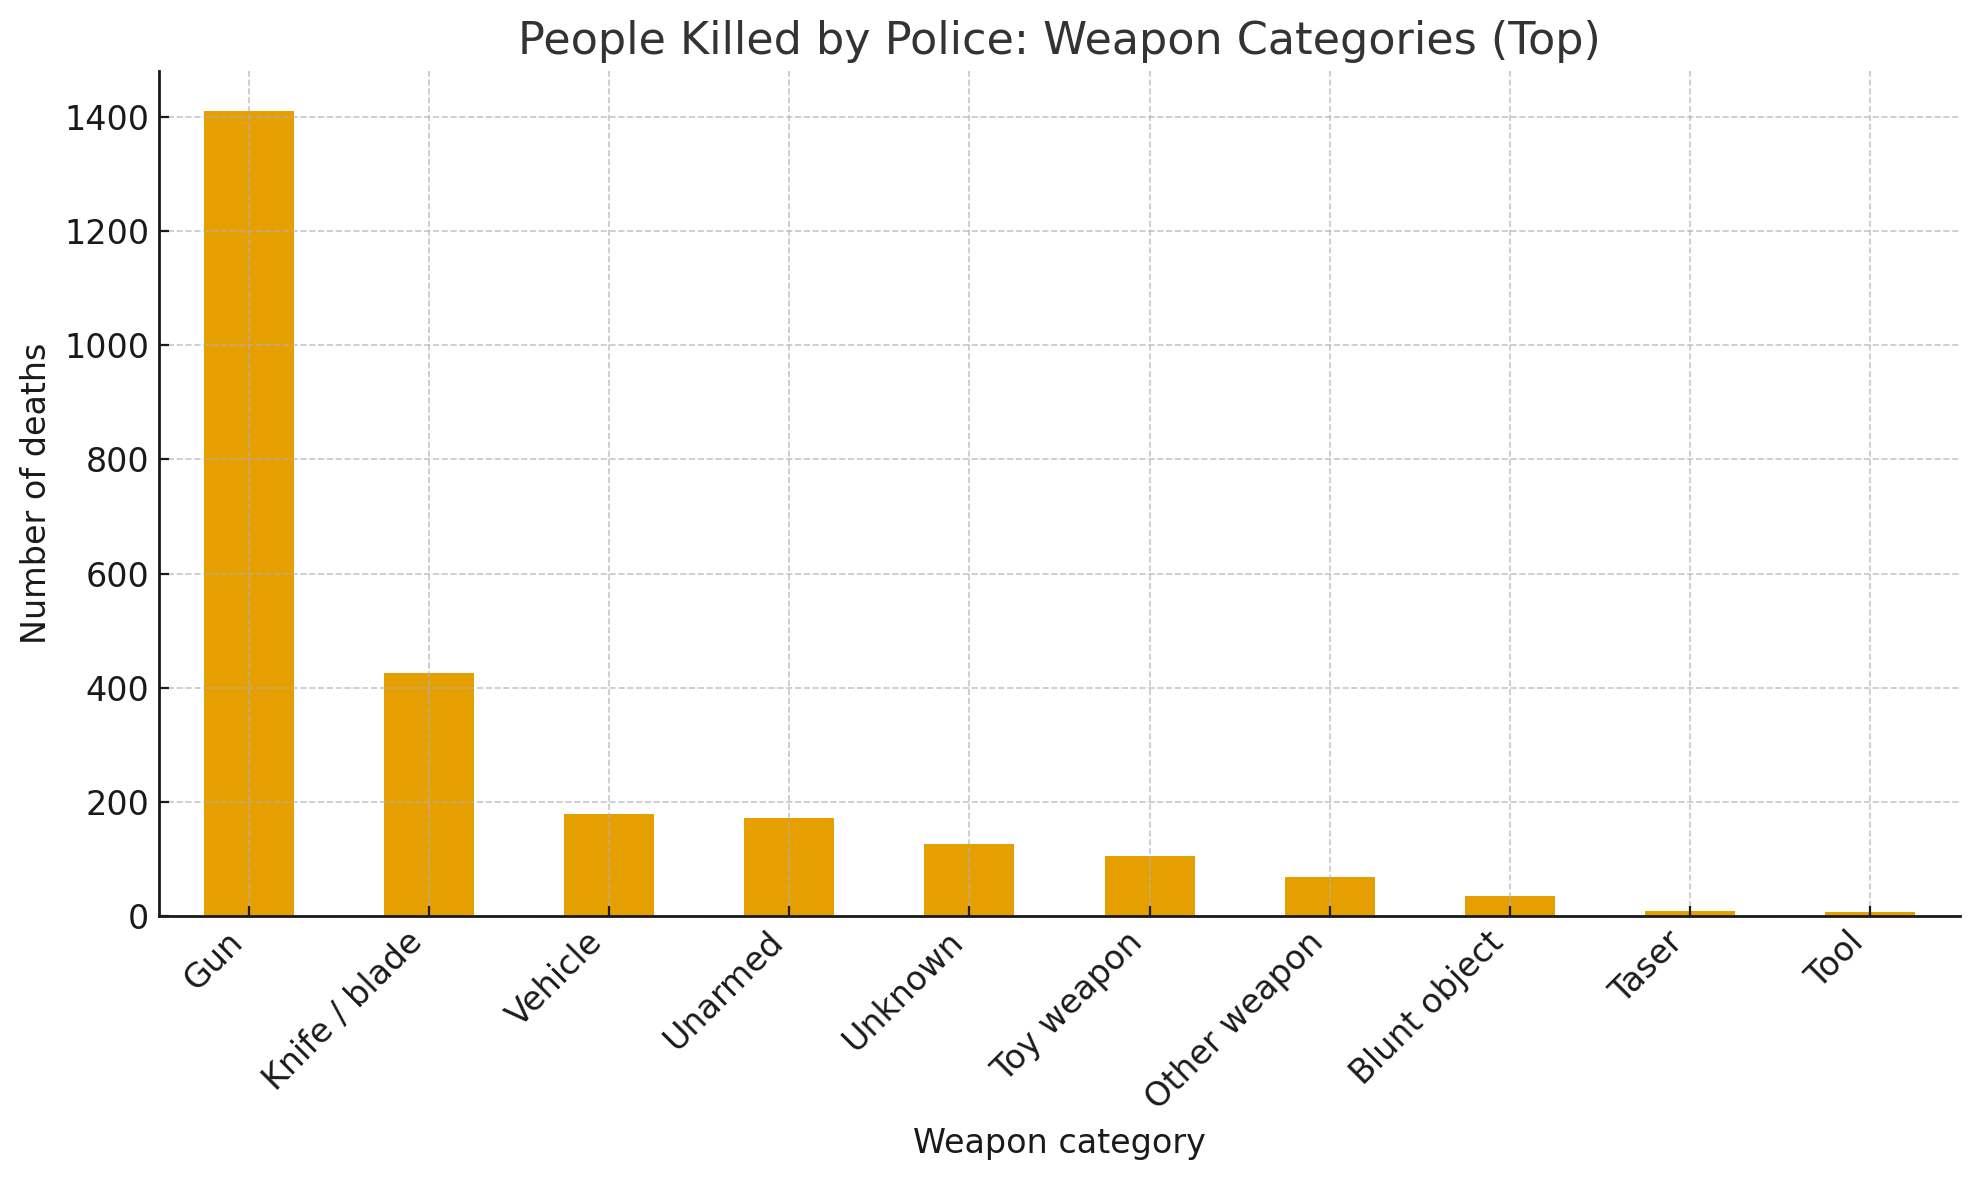

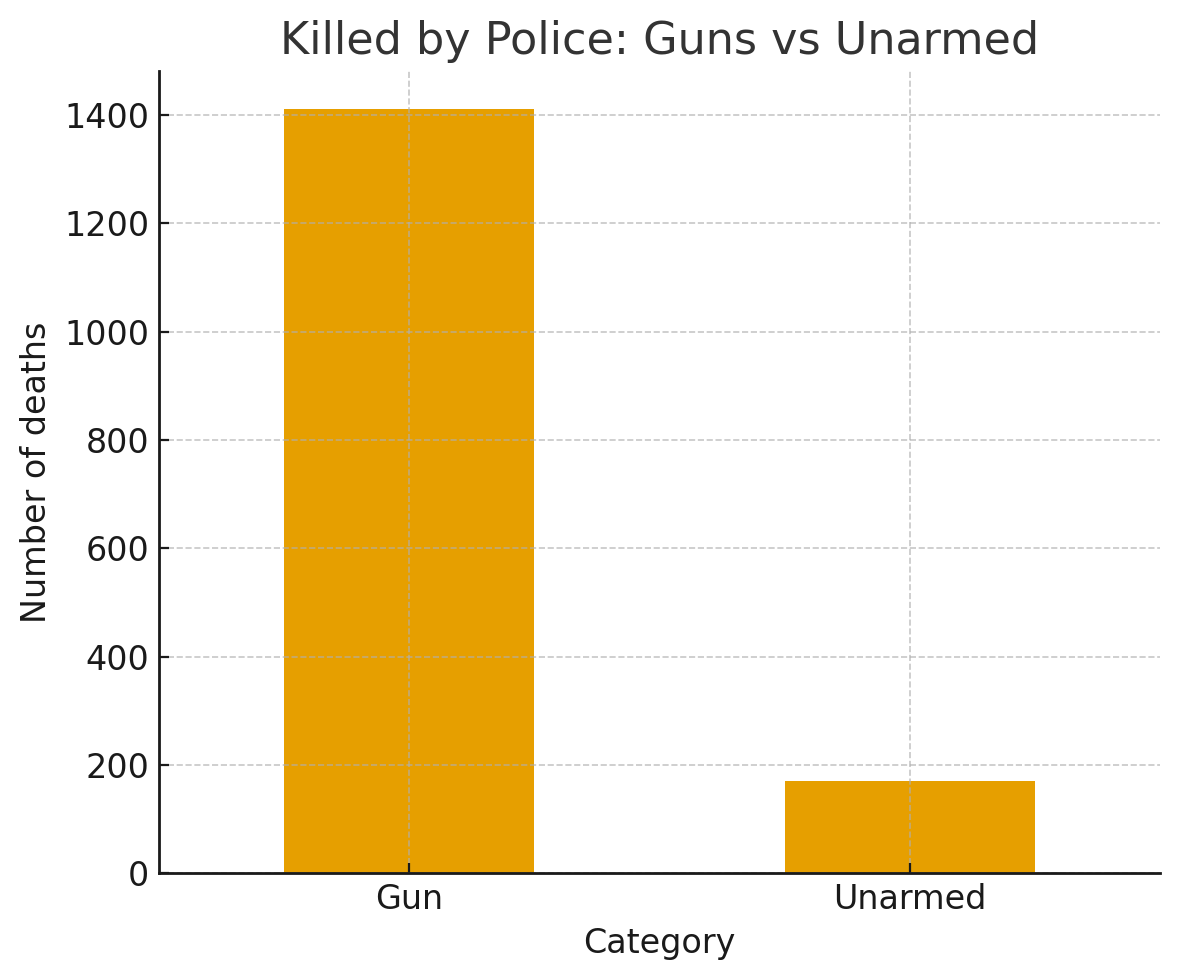

# Race of People Killed

Create a chart that shows the total number of people killed by race.

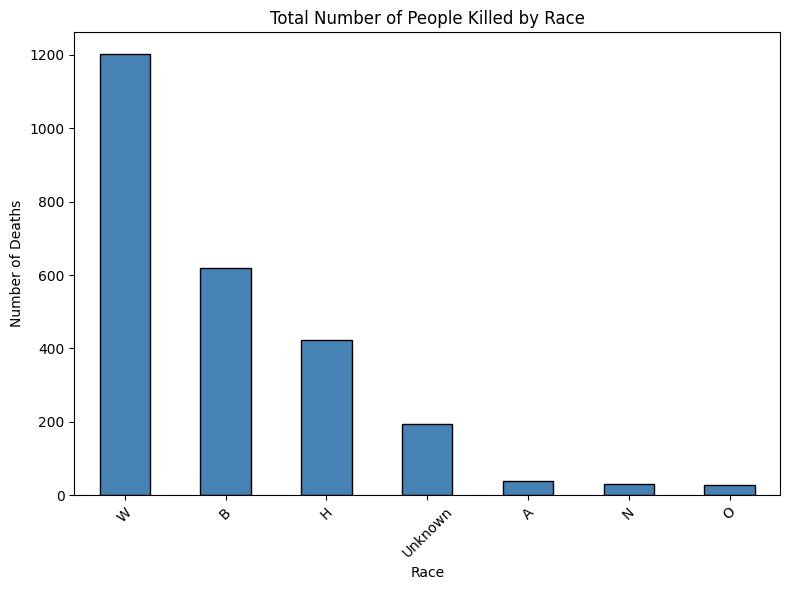

,count
race,
W,1201
B,618
H,423
Unknown,195
A,39
N,31
O,28


In [31]:
import matplotlib.pyplot as plt

# 欠損処理
df["race"] = df["race"].fillna("Unknown")

# 人種ごとの件数を集計
race_counts = df["race"].value_counts()

# 棒グラフで可視化
plt.figure(figsize=(8,6))
race_counts.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Total Number of People Killed by Race")
plt.xlabel("Race")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

race_counts


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

People killed with mental illness signs: 0
Total people killed: 2535
Percentage with mental illness signs: 0.00%


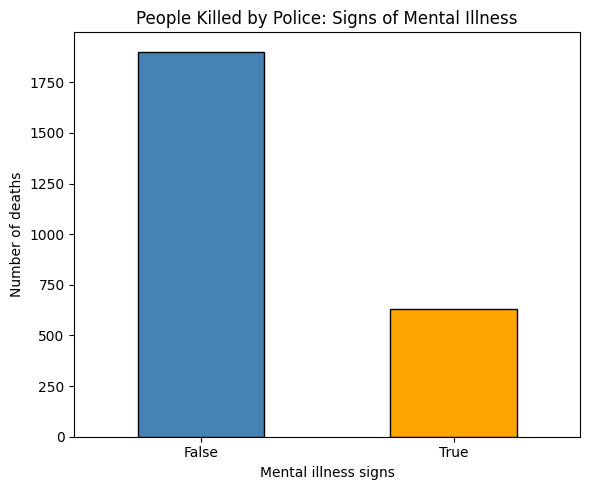

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み（既に df がある場合は不要）
df = pd.read_csv("Deaths_by_Police_US.csv", encoding="windows-1252")

# 欠損処理
df["signs_of_mental_illness"] = df["signs_of_mental_illness"].fillna("False")

# True / False の件数カウント
mental_counts = df["signs_of_mental_illness"].value_counts()

# 割合計算
mental_percentage = (mental_counts.get("True", 0) / len(df)) * 100

print("People killed with mental illness signs:", mental_counts.get("True", 0))
print("Total people killed:", len(df))
print(f"Percentage with mental illness signs: {mental_percentage:.2f}%")

# 棒グラフで可視化
plt.figure(figsize=(6,5))
mental_counts.plot(kind="bar", color=["steelblue", "orange"], edgecolor="black")
plt.title("People Killed by Police: Signs of Mental Illness")
plt.xlabel("Mental illness signs")
plt.ylabel("Number of deaths")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

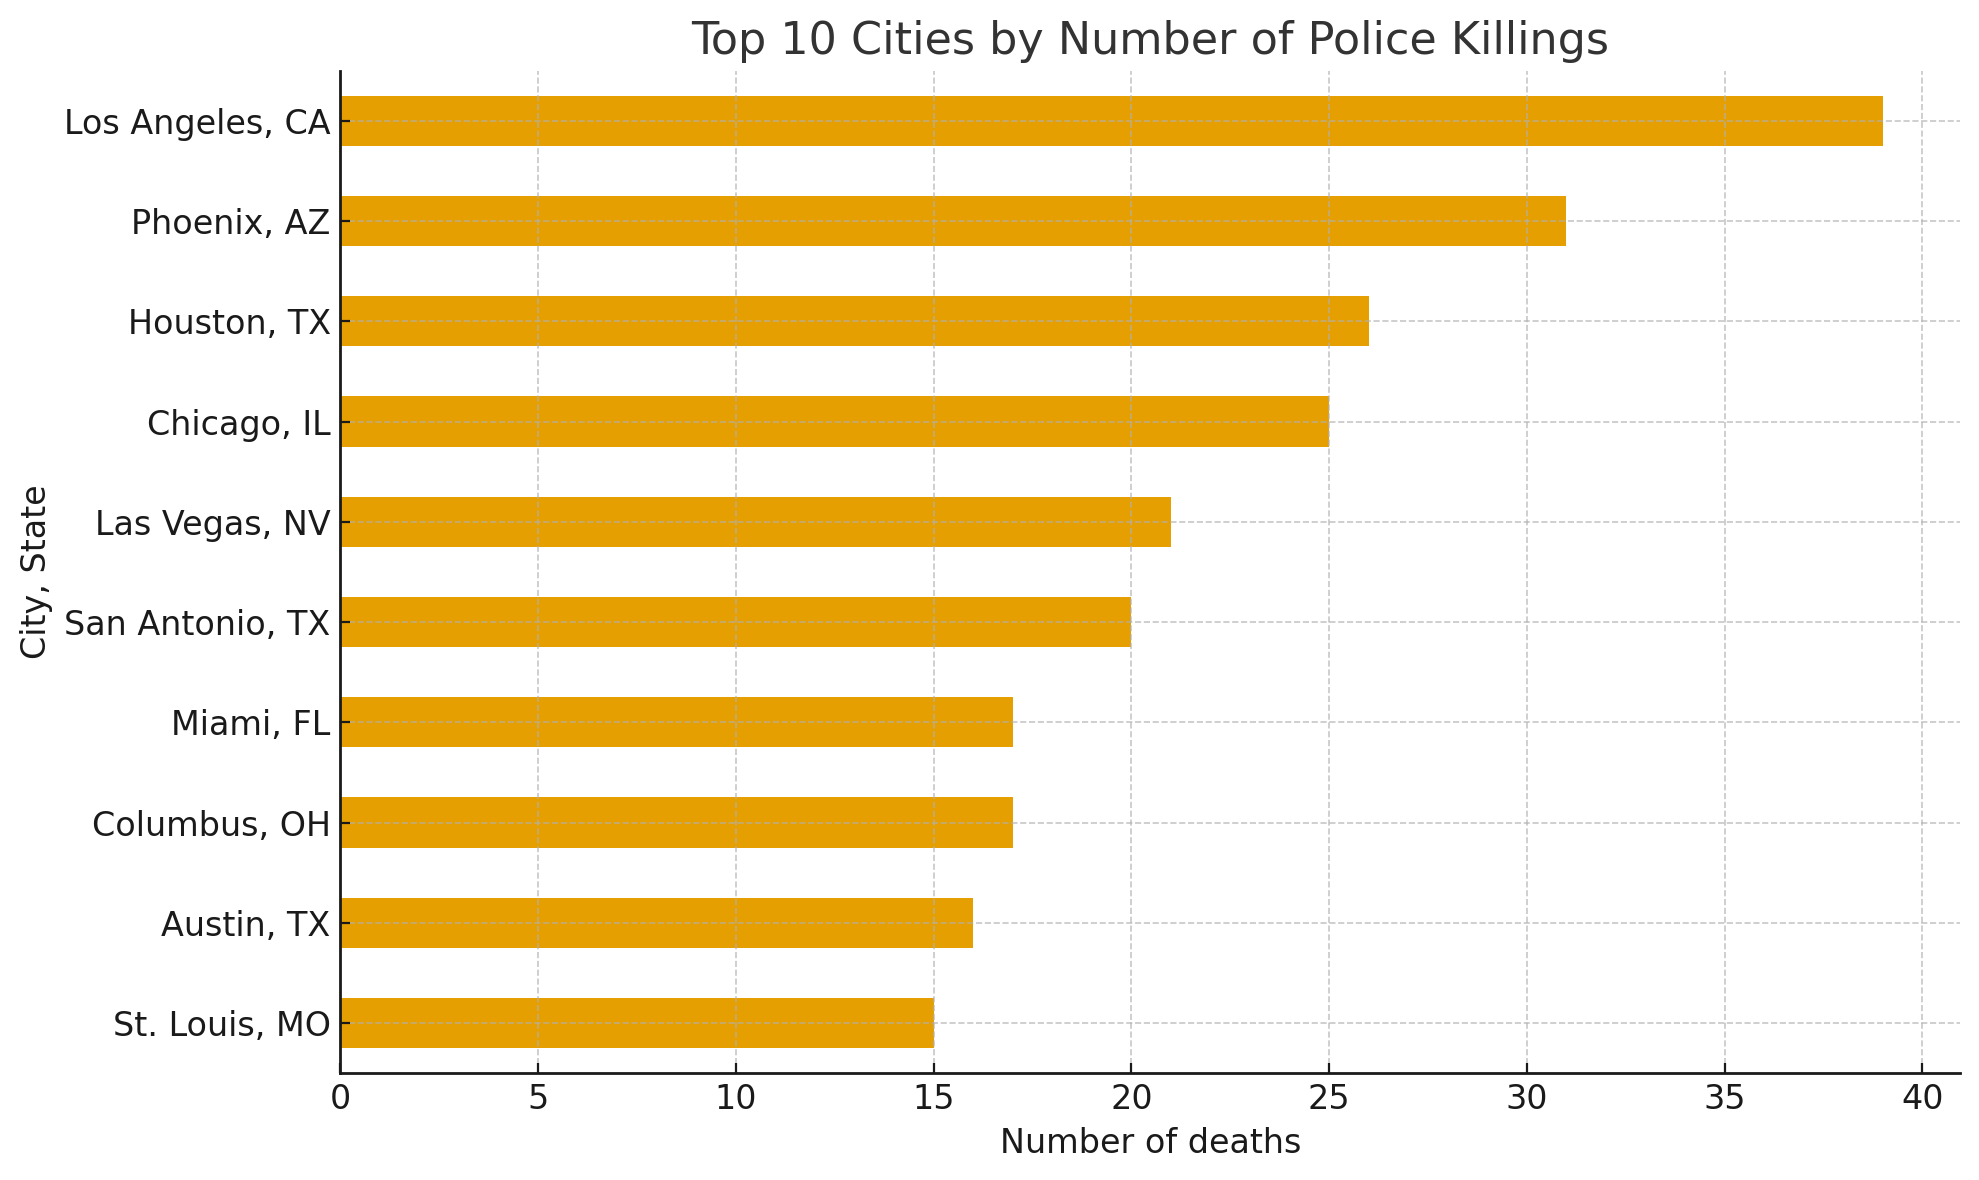

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

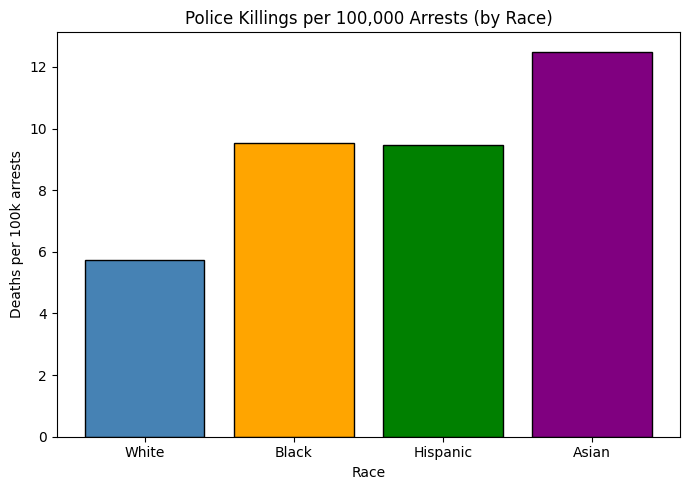

,Race,Arrests,Police_Killings,Deaths per 100k arrests
0,White,6960000,400,5.75
1,Black,2620000,250,9.54
2,Hispanic,1900000,180,9.47
3,Asian,120000,15,12.50


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# データ
data = {
    "Race": ["White", "Black", "Hispanic", "Asian"],
    "Arrests": [6960000, 2620000, 1900000, 120000],
    "Police_Killings": [400, 250, 180, 15]
}

df_rates = pd.DataFrame(data)
df_rates["Deaths per 100k arrests"] = df_rates["Police_Killings"] / df_rates["Arrests"] * 100000

# 棒グラフ
plt.figure(figsize=(7,5))
plt.bar(df_rates["Race"], df_rates["Deaths per 100k arrests"], color=["steelblue","orange","green","purple"], edgecolor="black")
plt.title("Police Killings per 100,000 Arrests (by Race)")
plt.ylabel("Deaths per 100k arrests")
plt.xlabel("Race")
plt.tight_layout()
plt.show()

df_rates


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')